<a href="https://colab.research.google.com/github/9kitsune/pi-g/blob/master/pi_g_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pandas and Numpy 
Data analysis for Column monitoring
Upload 


In [21]:
#install additional packages
#pip install holoviews
pip install pygal

    100% |████████████████████████████████| 133kB 5.9MB/s 


In [1]:
#import csv data file
from google.colab import files
uploaded = files.upload()


Saving slog-2019-03-19_09_54.csv to slog-2019-03-19_09_54.csv


In [0]:
#load csv into dataframe, Set DateTimeIndex on timestamp, put data into 15sec bins
import pandas as pd
import numpy as np
import io

slog = pd.read_csv(io.BytesIO(uploaded['slog-2019-03-19_09_54.csv']))

slog = slog.set_index(pd.DatetimeIndex(slog['timestamp']))

slog.resample('15S').mean()

#split the dataframe into xyz array only
xyz = np.split(slog, [3], axis=1)

xyz[0]

#put xyz back into a dataframe
df_xyz = pd.DataFrame(xyz[0])



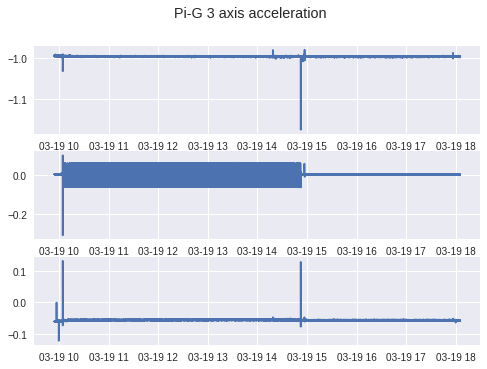

In [0]:
### use matplotlib to plot 3x plots ###

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

fig = plt.figure()

X = df_xyz[["accel_x"]]
Y = df_xyz[["accel_y"]]
Z = df_xyz[["accel_z"]]

plt.subplot(311)
plt.plot(X)

plt.subplot(312)
plt.plot(Y)

plt.subplot(313)
plt.plot(Z)

plt.suptitle('Pi-G 3 axis acceleration')
plt.show()



In [0]:
# select top 50 rows for easier modelling.
top50 = df_xyz.head(n=50)

top50

In [19]:
#Bokeh visualisation

from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource, CDSView
from bokeh.io import output_notebook

output_file('chart.html')
output_notebook()
p = figure(x_axis_type="datetime")

data = xyz[0]
source = ColumnDataSource(data)
#view = CDSView(source=source, filters=[filter1, filter2])
#p.circle(x=TS, y=Y, color='red', legend='circle')

#show(p)

p.circle(x="timestamp", y="accel_x", color='red', source=source)
p.line(x="timestamp", y="accel_x", color='red', source=source)

p.triangle(x="timestamp", y="accel_y", color='green', source=source)
p.line(x="timestamp", y="accel_y", color='green', source=source)

p.square(x="timestamp", y="accel_z", color='blue', source=source)
p.line(x="timestamp", y="accel_z", color='blue', source=source)

show(p)

Loading BokehJS ...

In [39]:
#redefines the source table
#data_values = df_xyz.values
data_values = top50.values

#pygal visualisation
import pygal as pg
radar_chart = pg.Radar()

radar_chart.title = 'Pi-G acceleration'
radar_chart.add('accel_x', data_values[:, 0])
radar_chart.add('accel_y', data_values[:, 1])
radar_chart.add('accel_z', data_values[:, 2])
radar_chart.render()

#data_values[:,0] #first column in array




b'<?xml version=\'1.0\' encoding=\'utf-8\'?>\n<svg xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" id="chart-6cffef71-ec31-4dac-94ca-59a9c64db778" class="pygal-chart" viewBox="0 0 800 600"><!--Generated with pygal 2.4.0 (lxml) \xc2\xa9Kozea 2012-2016 on 2019-03-25--><!--http://pygal.org--><!--http://github.com/Kozea/pygal--><defs><style type="text/css">#chart-6cffef71-ec31-4dac-94ca-59a9c64db778{-webkit-user-select:none;-webkit-font-smoothing:antialiased;font-family:Consolas,"Liberation Mono",Menlo,Courier,monospace}#chart-6cffef71-ec31-4dac-94ca-59a9c64db778 .title{font-family:Consolas,"Liberation Mono",Menlo,Courier,monospace;font-size:16px}#chart-6cffef71-ec31-4dac-94ca-59a9c64db778 .legends .legend text{font-family:Consolas,"Liberation Mono",Menlo,Courier,monospace;font-size:14px}#chart-6cffef71-ec31-4dac-94ca-59a9c64db778 .axis text{font-family:Consolas,"Liberation Mono",Menlo,Courier,monospace;font-size:10px}#chart-6cffef71-ec31-4dac-94ca-59a9c64db77